## Clustering: k-means and linkage-based clustering

In this notebook we are going to practice with the k-means and the linkage-based (called "agglomerative" in scikit learn) clustering algorithms.

In particular you are going to implement the k-means algorithm from scratch and to compare the results with the implementation already present in the sklearn library.

In [1]:
# Load the required packages
# If a package is missing in your setup, install it with 'conda install <package_name>' 
# or with 'pip install <package_name>'
%matplotlib inline  

import numpy as np
import scipy as sp
import imageio as imio
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

from mpl_toolkits.mplot3d import Axes3D #3d plotting functions
from matplotlib import pyplot
from PIL import Image

from copy import deepcopy  #deepcopy ensures that a copy of all the object data is performed (not just the pointers)

print ('scikit-learn version: ', sklearn.__version__)

scikit-learn version:  0.21.2


## TO DO:
    
Place your ID number in the ID variable, it will be used as random seed (as usual the random seed can affect a little bit the results, try to change it)

In [2]:
# fix your ID ("numero di matricola") and the seed for random generator
ID =  1231682 #insert your ID number here
np.random.seed(ID)

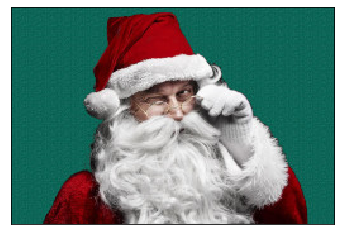

Santa Claus image:  (172, 256, 3)


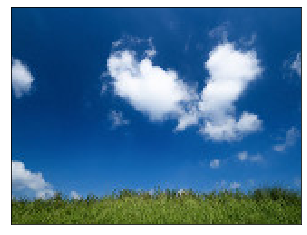

Landscape image:  (120, 160, 3)


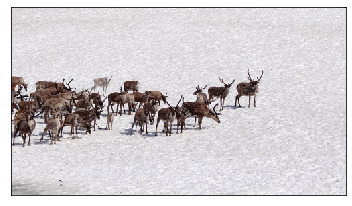

Reindeer image:  (281, 500, 3)


In [3]:
# load the provided images and display them (if you like you can experiment with other images)
image1 = imio.imread('data/santaclaus2.jpg')
image2  = imio.imread("data/landscape.jpg")
image3  = imio.imread("data/reindeer.jpg")



ax = plt.axes(xticks=[], yticks=[])
ax.imshow(image1)
plt.show()
print("Santa Claus image: ",image1.shape)

ax2 = plt.axes(xticks=[], yticks=[])
ax2.imshow(image2)
plt.show()
print("Landscape image: ",image2.shape)

ax3 = plt.axes(xticks=[], yticks=[])
ax3.imshow(image3)
plt.show()
print("Reindeer image: ",image3.shape)

We are going to start by using the Santa Claus image.


In [4]:
# reshape the data to a matrix of num_pixels x 3 
# (divide by 255 to have colors in [0 1] range for plotting functions of sklearn)

data = image1.reshape(image1.shape[0]*image1.shape[1], 3)/255

print(data.shape)
print(data)

(44032, 3)
[[0.05490196 0.4        0.34509804]
 [0.05098039 0.39607843 0.34117647]
 [0.05098039 0.39607843 0.34117647]
 ...
 [0.05882353 0.40392157 0.34901961]
 [0.05882353 0.40392157 0.34901961]
 [0.05882353 0.40392157 0.34901961]]


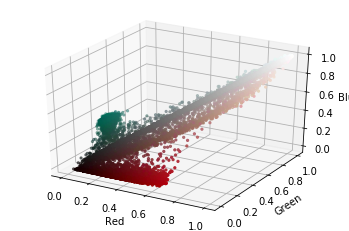

In [5]:
# Plot the points in the 3-dimensional space with normalized intervals between 0 and 1
# (corresponding to the three channels of the image, i.e. Red Green and Blue)

fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
r, g, b = list(data[:,0]), list(data[:,1]), list(data[:,2])

axis.scatter(r, g, b, c=data, s=5, marker="o")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
pyplot.show()

## TO DO 1
Implement the k-means algorithm manually (**do not use the kmeans function of sklearn and do not download implementations from other web sources**). The inputs to the function is the set of vectors to be clustered and the number of clusters. The output must contain the clusters barycenters, a vector associating each data point to the corresponding cluster and the error (value of the cost function) at each iteration.
Additionally, fix a maximum number of iterations of the k-means algorithm (e.g., 50).

Be careful about the initalization, you can use some random points from the training set, or get random values but ensure they are in the proper range. Poor initalizations can lead to the failure of the algorithm (in particular check that no cluster is initialized as empty, otherwise the algorithm can not update it).

In [6]:
def eucl(x,y,ax = 1):
    dist = np.linalg.norm(a - b, axis=ax)
    return dist

In [7]:
def my_kmeans(points, k):
# K-Means is an algorithm that takes in a dataset and a constant
# k that is the number of cluster
# and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
    max_iters=50
    n_row, n_col = points.shape
    
    #inital centroids random k
    #np.random.seed(1231682)
    #rand_indices =  np.random.randint(0,n_row, size = k)
    
    rand_indices = np.random.randint(0, n_row, k)
    centroids = points[rand_indices]
    old_centroids = np.zeros(centroids.shape)
    #errors = np.linalg.norm(centroids - old_centroids, axis =1)
    errors = []
    clusters = np.zeros(n_row)
    conv = np.zeros(max_iters)
    
    n_iter = 0
    for it in range(max_iters):
        
        #for r in range(n_row):
        #compute the distance and the set of centroid   
        d_centroid = sp.spatial.distance.cdist(points,centroids, 'euclidean')#np.linalg.norm(points[r]-centroids, axis =1)
            
        # Assign all training data to closest center
        clusters = np.argmin(d_centroid, axis = 1)
        #clusters[r] = argum
       
        # if the updated centroid is still the same,
        # then the algorithm converged
        if np.all(np.equal(centroids, old_centroids)) == True:
            break
        else:
            old_centroids= deepcopy(centroids)
            
        # select all data points that belong to cluster i and compute
        # the mean of these data points (each feature individually)
        # this will be our new cluster centroids
        
        for i in range(k):
           # s = [points[j] for j in range(n_row) if clusters[j] == i]
            centroids[i] = np.mean(points[clusters == i], axis=0)
        
        
        conv[it] = np.linalg.norm(centroids - old_centroids)#, axis =1)
        
        sqdist = np.power(np.min(d_centroid, axis = 1), 2)
        err = np.sum(sqdist)
        errors.append(err)
        
        if (conv[it]== 0):
            n_iter += it
            print('Convergence reached after:', n_iter, 'iterations')
            break
    
    return centroids, clusters, errors, n_iter





In [8]:
k = 3
mykmeans_centers,clusters,error, n_iter =  my_kmeans(data, k)
print(mykmeans_centers)

Convergence reached after: 10 iterations
[[0.77998175 0.77044226 0.76776639]
 [0.07859449 0.39470509 0.34315436]
 [0.39262661 0.05386229 0.0671155 ]]


## TO DO 2:

Now try the function you developed on the Santa Claus image with three clusters (k=3). 

Then plot the data points in the 3-dimensional space, each point must be coloured based on the membership to one of the clusters. Additionally, plot the respective clusters centroids (use a different shape, size or color to highlight the centroids).

Convergence reached after: 10 iterations
[[0.39262661 0.05386229 0.0671155 ]
 [0.07859449 0.39470509 0.34315436]
 [0.77998175 0.77044226 0.76776639]]


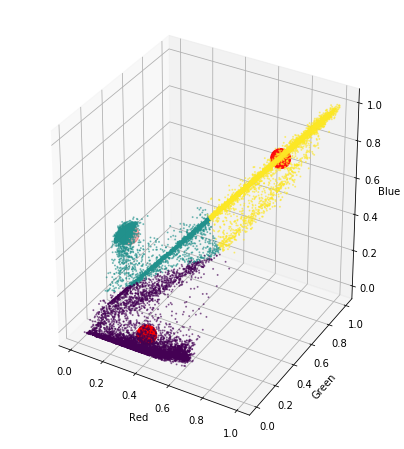

In [9]:
k = 3
mykmeans_centers,clusters,error, n_iter =  my_kmeans(data, k)
print(mykmeans_centers)

fig = pyplot.figure(figsize =(7,8))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
axis.scatter(r, g, b, marker="o", c=clusters, s=1, cmap='viridis', zorder=0, alpha=0.5 )
axis.scatter(mykmeans_centers[:,0], mykmeans_centers[:,1], mykmeans_centers[:,2], c='red', s=400, zorder=10)
pyplot.show()



### TO DO 3: 
Plot the value of the error versus the number of iterations

Text(0, 0.5, 'Error')

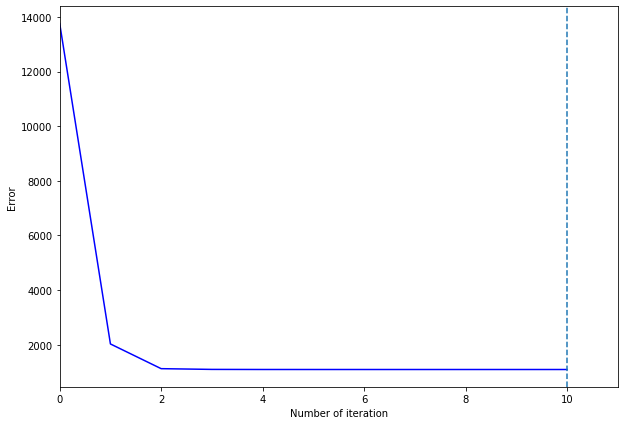

In [10]:
fig = pyplot.figure(figsize=(10,7))
axis = fig.add_subplot(1, 1, 1)
axis.plot(error,'b')
axis.axvline(n_iter, ls = '--')
axis.set_xlim(0,n_iter+1)
axis.set_xlabel('Number of iteration')
axis.set_ylabel('Error')

### TO DO 4:
Now use the k-means function provided in sklearn. Pass to the function the number of clusters and use multiple random initializations (n_init parameter). Go to the documentation page for further details

In [11]:
kmeans =  KMeans(n_clusters=3, n_init = 300)
#default n_init = 10
kmeans.fit(data)

new_clusters = kmeans.predict(data)

cluster_centers = kmeans.cluster_centers_
print(cluster_centers)

cluster_labels = kmeans.labels_

print('Convergence is reached after', kmeans.n_iter_, 'iterations')

[[0.07857562 0.39469374 0.34314218]
 [0.77994185 0.77040319 0.76772539]
 [0.39261211 0.05381584 0.06707119]]
Convergence is reached after 4 iterations


### TO DO 5:
Perform the same plot as above but with the output of the k-means function provided in sklearn.

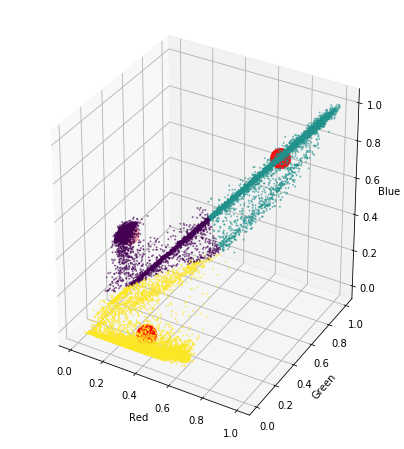

In [12]:
fig = pyplot.figure(figsize =(7,8))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
axis.scatter(r, g, b, marker="o", c= cluster_labels, s=1, cmap='viridis', zorder=0, alpha=0.5 )
axis.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2], c='red', s=400, zorder=10)
pyplot.show()


## Question 1: 

Compare the results obtained with your implementation and with k-means from sklearn. Do you observe any differences, i.e., do the two plots match? 

It can be seen that the clusters are the same but with different position meaning that the two plots match. However, using the "scratch" algorithm the convergence is reached after 10 iterations, while using sklearn is reached after 4 iterations only meaning that is way more faster. 


### TO DO 6:

Now display the segmented image based on the 3 clusters found above with both the k-means functions by sklearn and your k-means implementation

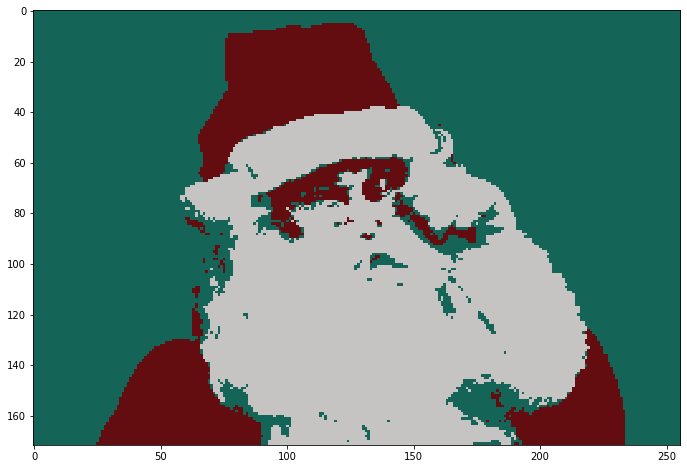

In [13]:
x, y, z = image1.shape
image_2d = image1.reshape(x*y, z)
image_2d.shape

plt.figure(figsize = (15,8))
plt.imshow(cluster_centers[cluster_labels].reshape(x, y, z))

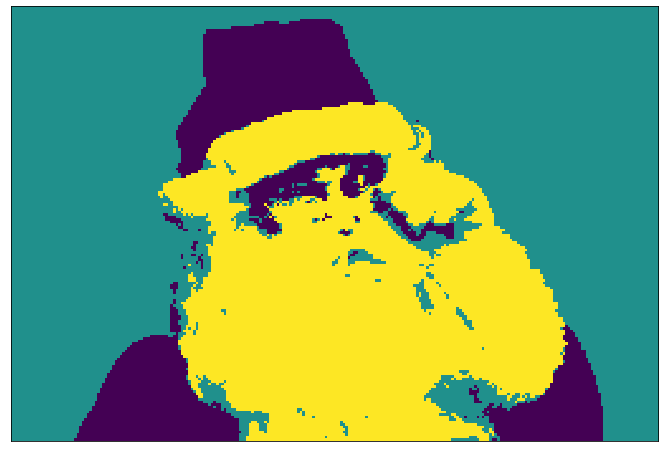

In [14]:
# ADD CODE TO DISPLAY THE IMAGE OBTAINED WITH YOUR CODE
plt.figure(figsize = (15,8))
seg_image1_code = deepcopy ( clusters.reshape(image1.shape[0],image1.shape[1]))
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(seg_image1_code)
plt.show()


## Question 2: 

What do you observe? Do you think clustering is useful for image segmenation? And for image compression?  Comment your answer.

Clustering is a useful tool for image segmentation. Indeed, it can be easily be distinguished in both images a Santa Claus. Image compress can be used by the clustering method, improving the algorithm while making the image 'less heavy'.

## TO DO 8:

Now load the landscape image (optional: try also with the reindeer image) and segment it using kmeans with k varying from 2 to 15 clusters. You can use the sklearn implementation.

Then plot the resulting data points in the 3-dimensional space, each point must be colored based on the cluster membership. 
Additionally, plot the respective clusters centroids.



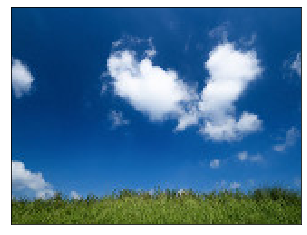

Second image

Landscape image:  (120, 160, 3)
(19200, 3)
2 clusters:
Convergence is reached after 4 iterations


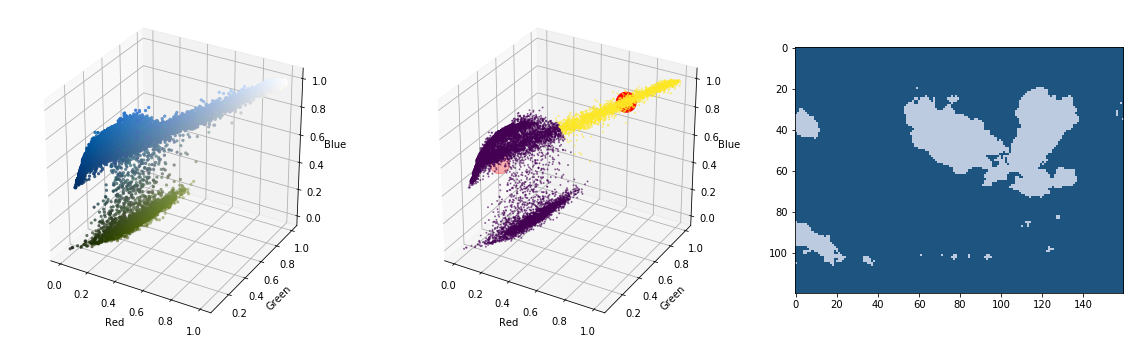





3 clusters:
Convergence is reached after 19 iterations


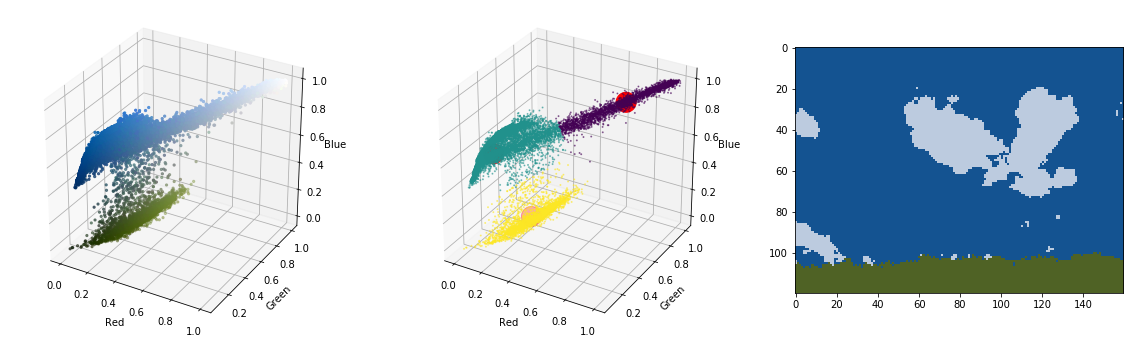





4 clusters:
Convergence is reached after 4 iterations


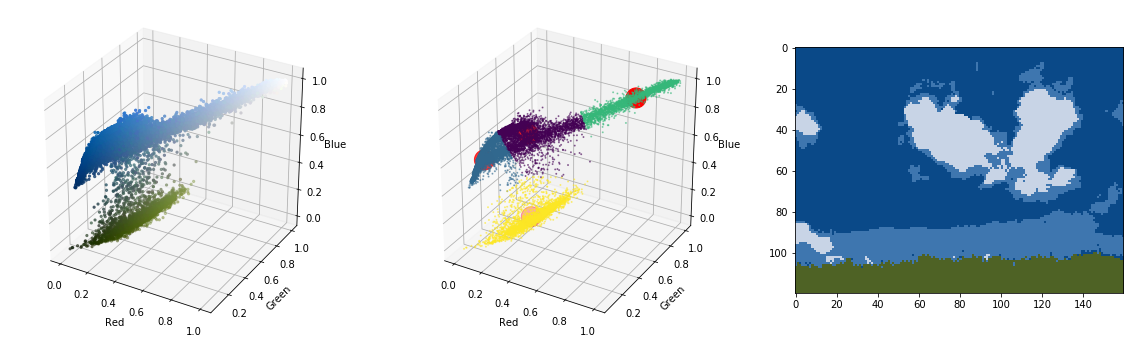





5 clusters:
Convergence is reached after 5 iterations


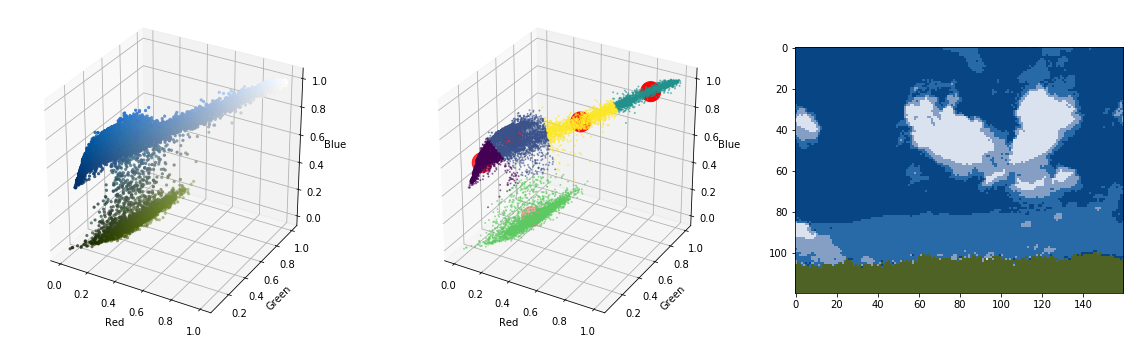





6 clusters:
Convergence is reached after 8 iterations


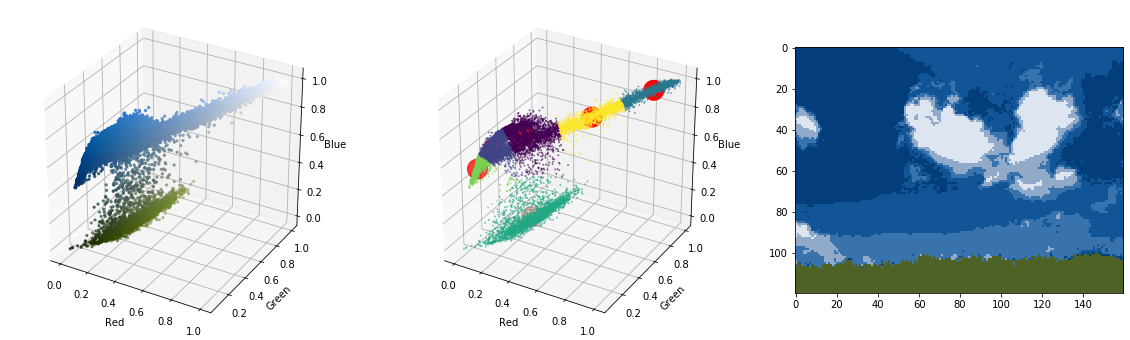





7 clusters:
Convergence is reached after 21 iterations


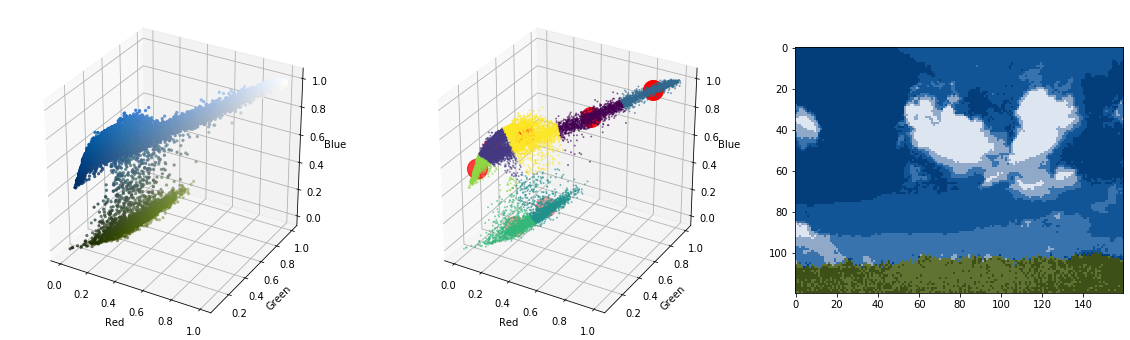





8 clusters:
Convergence is reached after 11 iterations


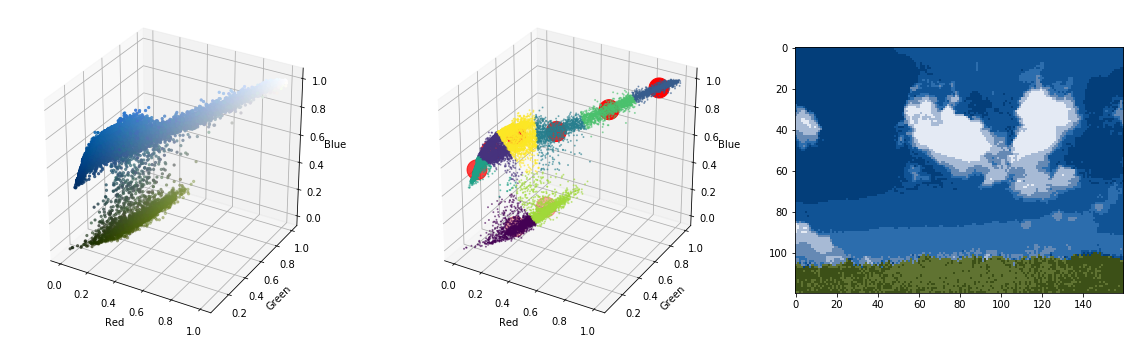





9 clusters:
Convergence is reached after 11 iterations


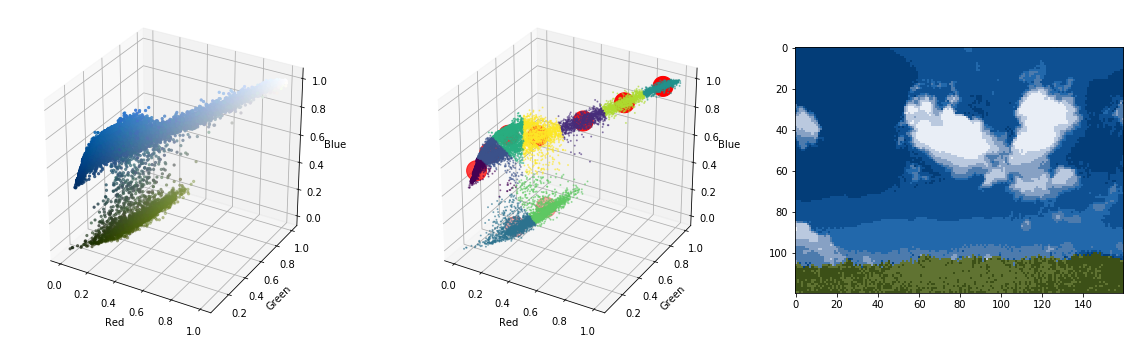





10 clusters:
Convergence is reached after 13 iterations


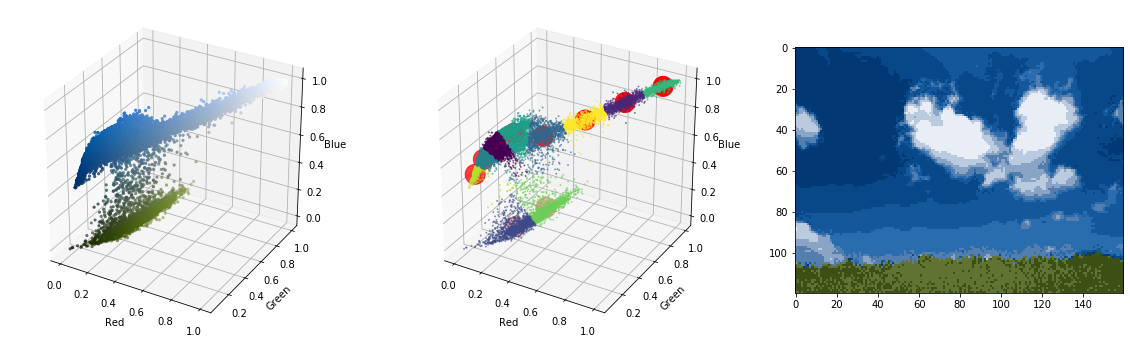





11 clusters:
Convergence is reached after 22 iterations


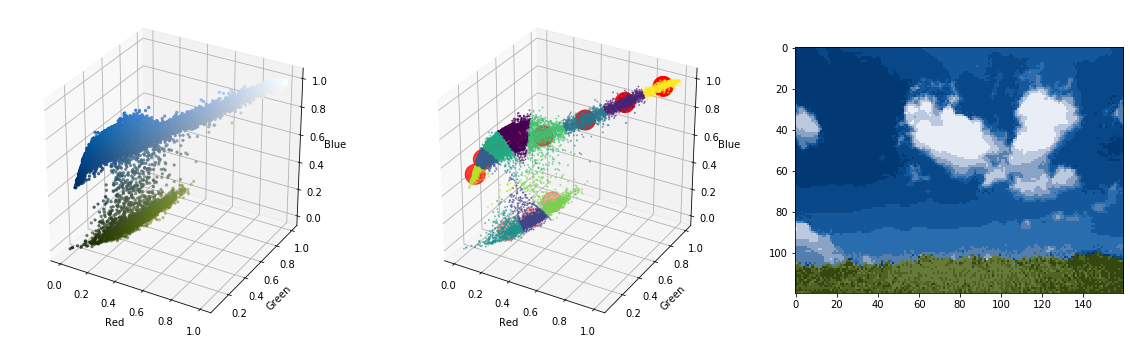





12 clusters:
Convergence is reached after 24 iterations


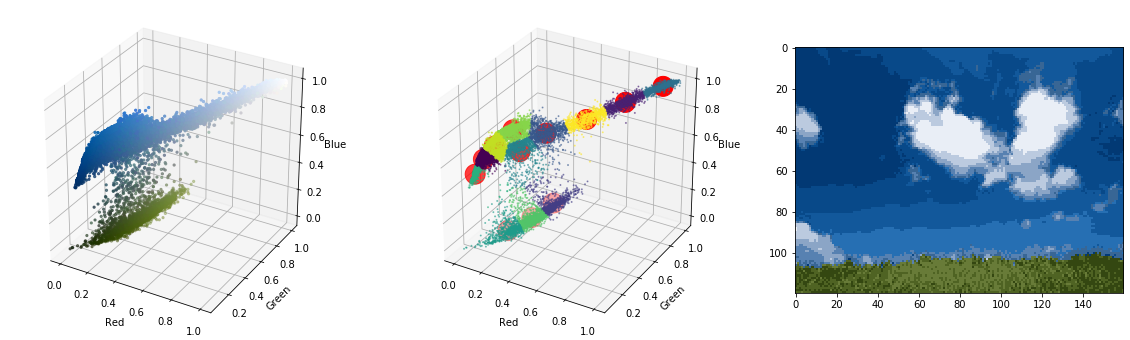





13 clusters:
Convergence is reached after 19 iterations


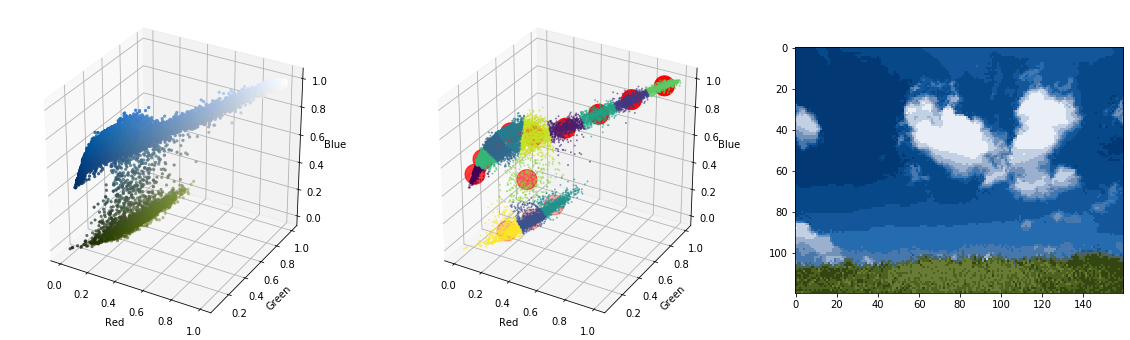





14 clusters:
Convergence is reached after 54 iterations


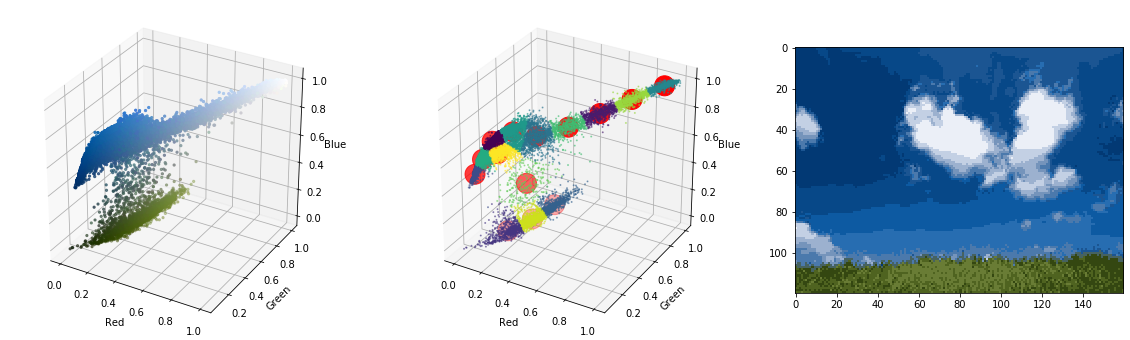





15 clusters:
Convergence is reached after 55 iterations


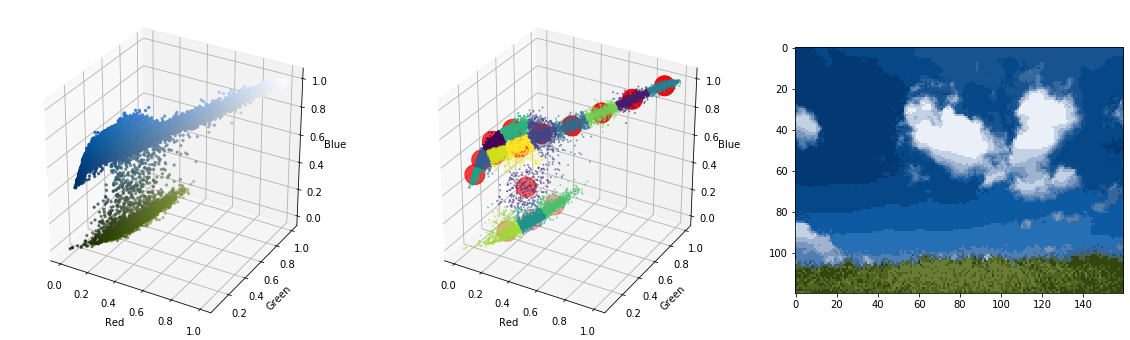

In [15]:
ax2 = plt.axes(xticks=[], yticks=[])
ax2.imshow(image2)
plt.show()
print("Second image\n")
print("Landscape image: ",image2.shape)

data = image2.reshape(image2.shape[0]*image2.shape[1], 3) / 255
print(data.shape)


for k in range(2,16):
    
    print(k, 'clusters:')
    
    kmeans =  KMeans(n_clusters=k, n_init = 300)
    kmeans.fit(data)

    new_clusters = kmeans.predict(data)
    cluster_centers = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_

    print('Convergence is reached after', kmeans.n_iter_, 'iterations')
    
    #plot
    fig = pyplot.figure(figsize=(20,6))
    axis = fig.add_subplot(1, 3, 1, projection="3d")
    r, g, b = list(data[:,0]), list(data[:,1]), list(data[:,2])
    axis.scatter(r, g, b, c=data, s=5, marker="o")
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    
    #plot cluster center
    axis = fig.add_subplot(1, 3, 2, projection="3d")
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    axis.scatter(r, g, b, marker="o", c = new_clusters, s=1, cmap='viridis', zorder=0, alpha=0.5 )
    axis.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2], c='red', s=400, zorder=10)
    #pyplot.show()
    
    
    #plot
    x, y, z = image2.shape
    image_2d = image2.reshape(x*y, z)
    image_2d.shape

    axis = fig.add_subplot(1, 3, 3)
    axis.imshow(cluster_centers[cluster_labels].reshape(x, y, z))
    
    plt.show()
    print('\n')
    print('\n')

## TO DO 9:

Plot for different values of k (e.g. k between 2 and 15) the respective error of the kmeans algorithm 

Text(0, 0.5, 'Error')

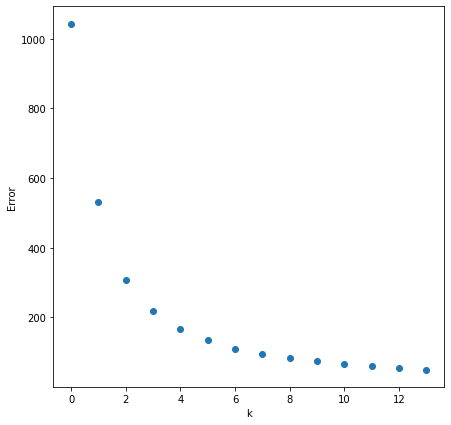

In [16]:
# ADD YOUR CODE FOR PLOTTING  
errors = []

for k in range (2, 16):
   
    
    kmeans =  KMeans(n_clusters=k,  n_init = 300)
    kmeans.fit(data)

    new_clusters = kmeans.predict(data)
    cluster_centers = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_
    errors.append(kmeans.inertia_)

fig = pyplot.figure(figsize = (7,7))
axis= fig.add_subplot(1,1,1)   
axis.plot(errors,'o')
axis.set_xlabel('k')
axis.set_ylabel('Error')
    

##  Question 3:

Compare the results with different values of k, what do you observe? 

Analyze also the error, which one do you think is the optimal value of k ?

Is there a single, clear answer ? 

It can be seen that increasing the value of k the error reaches a threshold (let's say in k = 8 give or take). It can be seen that the segmentation improves a lot when k is large, of course, that makes sense because we are getting further details and hence, smaller and smaller errors. However,  one can also notice that the segmentation does not change so much when k>8. When k >8 the error is already too small and if we pass this number there is no further more segmentation to be done on the image and hence, a compression of it. 

Of course, there is not a clear answer. k = 8 just seems a value that gives you a good segmentation, but it can be easily be used other values near 8 that does not overestimate the number of segmentation available.

## Linkage-based clustering

The second part of the assignment concern instead linkage-based clustering. We will use the AgglomerativeClustering module of sklearn. 

In [17]:
# Import required packages
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics, datasets
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# Load sample data
data = np.load('data/moon_data.npz')
print(data.files)
X = data['X']
labels_true = data['labels_true']

['X', 'labels_true']


### TO DO 10: 

Now exploit the AgglomerativeClustering algorithm on the provided sample data points. Use the "single" linkage type that correspond to the minimum distance criteria seen in the lectures and 2 clusters. Notice that the "single" option has been introduced recently in sklearn, if you get an error ensure you have a recent version of the library. Plot the resulting clustering.

In [18]:
# #############################################################################
# Compute Agglomerative Clustering

db = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')
db.fit(X)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=5,
                        pooling_func='deprecated')

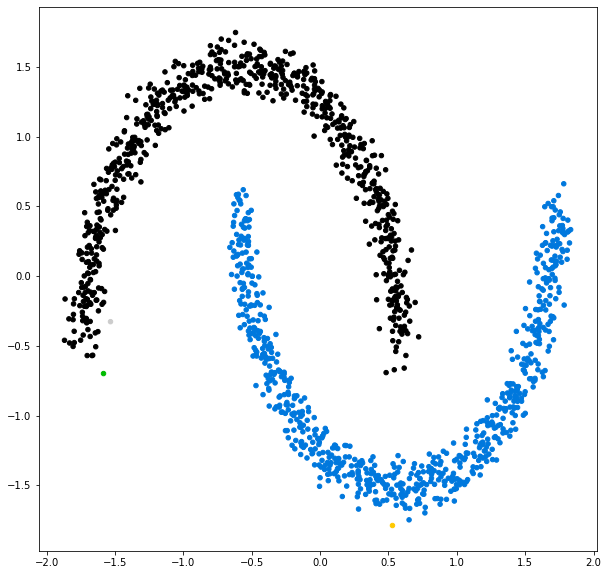

In [19]:
# Plot result
fig = pyplot.figure(figsize=(10,10))  
axis = fig.add_subplot(1, 1,1)
axis.scatter(X[:, 0], X[:, 1], c=db.labels_, cmap=plt.cm.nipy_spectral, alpha = 1,s=20)
pyplot.show()

### TO DO 11: 

Now try the KMeans with two clusters on the same dataset we used for the AgglomerativeClustering algorithm.

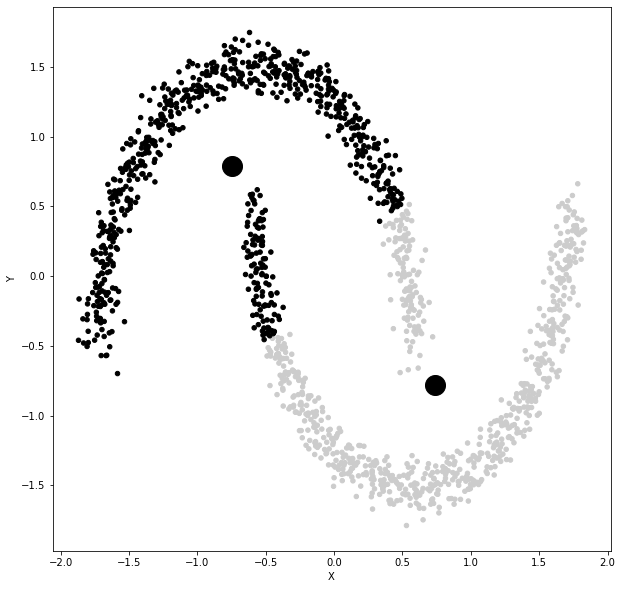

In [20]:
kmeans =  KMeans(n_clusters=2, n_init = 300)
kmeans.fit(X)

new_clusters = kmeans.predict(X)
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

fig = pyplot.figure(figsize=(10,10))
axis = fig.add_subplot(1, 1, 1)
axis.set_xlabel("X")
axis.set_ylabel("Y")
axis.scatter(X[:, 0], X[:, 1], marker="o", c = new_clusters, s=20, cmap=plt.cm.nipy_spectral, zorder=20, alpha=1 )
axis.scatter(cluster_centers[:,0], cluster_centers[:,1], c='black', s=400, zorder=20)


## Question 4:

Compare the results of K-means and Agglomerative Clustering and explain what you observe and why?



As we expected since both of the technics are not the same, it can be seen that the two algorithms reach something different. One can see that the agglomerative cluster seems to be the correct one,  this mechanism finds points of data that are closest to each other, and successively groups them together. On the other hand,  K means aims to find local maxima in each iteration by assigning the data point to the closes centroids.